In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from muon.deep_clustering.clustering import Config, Cluster
from muon.utils.subjects import Subjects
from muon.deep_clustering.mapping import Mapping

import os
import pickle
import math
import logging
import numpy as np
import pandas as pd
import csv
logger = logging.getLogger(__name__)

config = 'mnt/dec/dec_no_labels_2/config_jupyter.json'
config = Config.load(config)
print(config.__dict__)
subjects = pickle.load(open(config.subjects, 'rb'))
# cluster = Cluster.create(subjects, config)

import muon.project.parse_export as pe
agg = pe.Aggregate.load('mh2')

Using TensorFlow backend.


{'subjects': 'mnt/dec/dec_no_labels/subjects.pkl', 'rotation': False, 'momentum': 0.9, 'save_dir': 'mnt/dec/dec_no_labels', 'ae_weights': 'mnt/dec/dec_no_labels/ae_weights.h5', 'batch_size': 256, 'maxiter': 20000.0, 'lr': 0.01, 'tol': 0.001, 'update_interval': 140, 'nodes': [500, 500, 2000, 10], 'n_clusters': 50}


In [2]:
_s = list(agg.data['subjects'].keys())
subjects2 = subjects.subset(_s)
agg.apply_labels(subjects2)
cluster = Cluster.create(subjects2, config)
print('Training model')
cluster.train()

Training model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
___________________________________________________

In [3]:
def load_set(fname):
    with open(fname, 'r') as file:
        reader = csv.DictReader(file)
        return [int(item['subject']) for item in reader]
train = load_set('mnt/training_set/train.csv')
validate = load_set('mnt/training_set/test.csv')

In [4]:
mapping = Mapping(cluster, agg, train, validate)
print(mapping.FOM)

[0.84167237834132969]


/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


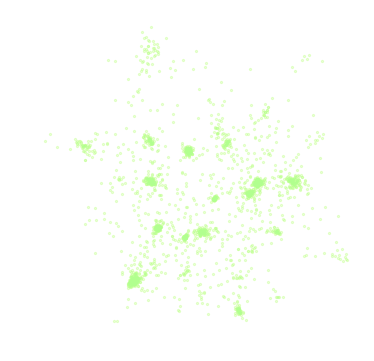

In [5]:
mapping.pca_plot()
plt.show()

In [6]:
mapping.apply_mapping()

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Train on 229169 samples, validate on 2474 samples
Epoch 1/10
229169/229169 [==============================] - 64s 281us/step - loss: 0.4618 - val_loss: 0.6121
Epoch 2/10
229169/229169 [==============================] - 65s 284us/step - loss: 0.4226 - val_loss: 0.6196
Epoch 3/10
229169/229169 [==============================] - 65s 284us/step - loss: 0.4082 - val_loss: 0.6232
Epoch 4/10
229169/229169 [==============================] - 66s 286us/step - loss: 0.3988 - val_loss: 0.6267
Epoch 5/10
229169/229169 [==============================] - 64s 279us/step - loss: 0.3936 - val_loss: 0.6264
Epoch 6/10
229169/229169 [==============================] - 65s 284us/step - loss: 0.3893 - val_loss: 0.6265
Epoch 7/10
229169/229169 [==============================] - 64s 278us/step - loss: 0.3857 - val_loss: 0.6275
Epoch 8/10
229169/229169 [==============================] - 64s 280us/step - loss: 0.3830 - val_loss: 0.6264
Epoch 9/10
229169/229169 [==============================] - 66s 287us/step - l

[0.84167237834132969, 0.84167237834132969, 0.83361588762412209]

In [7]:
y_pred = cluster.predictions.y_pred
y_true = cluster.subjects.get_charge_array()[1]
print(y_pred.size)
print(y_true.size)
print(len(subjects2))
agg.data['subjects']

9897
4938603
9897


{1: [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 49154: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0],
 49155: [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 32774: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 16391: [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 16392: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 45282: [0,
  0,
  0,

In [ ]:
agg.data['subjects']